<a href="https://colab.research.google.com/github/austinvanderlyn/School-Files/blob/master/DLChapter2Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
len(test_images)

10000

In [6]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,
                         activation = "relu",
                         input_shape = (28*28,)))
network.add(layers.Dense(10,
                         activation = "softmax"))

In [7]:
network.compile(optimizer = "rmsprop",
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])

In [8]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

In [9]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
network.fit(train_images, train_labels,
            epochs = 5,
            batch_size = 128)

Epoch 1/5
469/469 [==============================] - 6s 10ms/step - loss: 0.2569 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1041 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0687 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0497 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0371 - accuracy: 0.9886


In [11]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_acc:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0672 - accuracy: 0.9792
test_acc: 0.979200005531311


In [12]:
import numpy as np
x = np.array(12)
x

array(12)

In [13]:
x.ndim

0

In [14]:
x = np.array([12, 3, 6, 14])
x

array([12,  3,  6, 14])

In [15]:
x.ndim

1

In [16]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [17]:
x.ndim

2

In [18]:
x = np.array([[[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]]])

In [19]:
x.ndim

3

In [20]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [21]:
print(train_images.ndim)

3


In [22]:
print(train_images.shape)

(60000, 28, 28)


In [23]:
print(train_images.dtype)

uint8


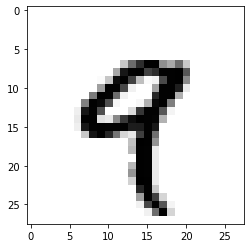

In [24]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [25]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [26]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [27]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [28]:
my_slice = train_images[:, 14:, 14:]

In [29]:
my_slice = train_images[:, 7:-7, 7:-7]

In [30]:
batch = train_images[:128]

In [31]:
batch = train_images[128:256]

In [32]:
def naive_relu(x):
  assert len(x.shape) == 2

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

In [33]:
def naive_add(x, y):
  assert len(x.shape) == 2
  assert x.shape == y.input_shape

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

In [35]:
def naive_add_matrix_and_vector(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[j]
  return x

In [36]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

In [39]:
def naive_vector_dot(x, y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]
  z = 0.
  for i in range(x.shape[0]):
    z += x[i] * y[i]
  return z

In [40]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [41]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

In [42]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,
                         activation = "relu",
                         input_shape = (28*28,)))
network.add(layers.Dense(10,
                         activation = "softmax"))

In [43]:
network.compile(optimizer = "rmsprop",
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])

In [45]:
network.fit(train_images, train_labels,
            epochs = 5, batch_size = 128)

Epoch 1/5


ValueError: ignored